In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
#build the vocabulary of characters and mappings to/from the integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)
print(stoi)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [5]:
#build the dataset

block_size = 3 #context length: how many characters do we take to predict the next one?
X, Y = [], [] #X being the input and Y being the label for each example within X
for w in words[:]:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] #crop context and append the character index

X = torch.tensor(X)
Y = torch.tensor(Y)

In [4]:
#build the dataset (but make it more generic for the 3 datasets

def build_dataset(words):
    block_size = 3 #context length: how many characters do we take to predict the next one?
    X, Y = [], [] #X being the input and Y being the label for each example within X
    for w in words[:]:
    
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] #crop context and append the character index

    X = torch.tensor(X)
    Y = torch.tensor(Y)

    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [18]:
n1

25626

In [5]:
C = torch.randn((27, 2))
C[5]
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [1]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C ##@ means matrix multiplication

NameError: name 'F' is not defined

In [32]:
C

tensor([[ 0.8628,  1.9707],
        [-0.0667,  2.5976],
        [-1.3473,  0.6497],
        [-0.7804,  1.0857],
        [-2.1759, -0.0881],
        [-0.5501,  0.2176],
        [ 0.5831,  1.7435],
        [ 0.3404, -0.0779],
        [-0.5798, -0.9431],
        [ 1.3353, -0.8053],
        [-0.0075, -0.5457],
        [ 0.8025,  1.5129],
        [ 1.0724, -0.7989],
        [-0.2764,  0.0959],
        [-1.2379,  0.3116],
        [-1.3609,  1.0553],
        [ 0.4528, -2.0198],
        [ 0.3815,  0.5613],
        [-1.5102, -0.6619],
        [-0.1412, -0.4904],
        [-0.8642, -0.1019],
        [ 0.4093, -0.8394],
        [-0.7318,  0.1005],
        [-0.7016,  1.0032],
        [-2.1489, -3.1655],
        [ 0.3508, -0.4030],
        [ 0.8423,  0.5430]])

In [7]:
C[torch.tensor([1,2,3,3,3])] #Indexing by lists

tensor([[ 1.0792,  1.0441],
        [ 2.2444,  0.8444],
        [-0.4190, -0.4285],
        [-0.4190, -0.4285],
        [-0.4190, -0.4285]])

In [41]:
emb = C[X] #By extension, indexing by tensor

In [8]:
#Squeezing our characters into 2 dimensions, with 3 neurons to create our hidden layer, hence 6 rows. 100 columns is just random
W1 = torch.randn((6, 100)) 
b1 = torch.randn(100)

In [9]:
#Different ways of manipulating the tensor to enable matrix multiplication
#tensor.view() is the most efficient because it changes how the 1D list of tensor values
#in system is viewed instead of copying new tensors
torch.cat(torch.unbind(emb, 1), 1) == emb.view(32, 6) #32 is the hard-coded number of trigrams formed from words[:5]

NameError: name 'emb' is not defined

In [58]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) #view(-1, 6) works too, pytorch infers the number of the 0th dimension
h.shape

torch.Size([32, 100])

In [59]:
h

tensor([[-0.9997, -0.0527, -0.9991,  ..., -1.0000,  0.4251, -1.0000],
        [-0.8829,  0.9243, -0.9998,  ..., -0.9999,  0.0015, -1.0000],
        [-0.7951,  0.8219, -0.9948,  ..., -0.9990, -0.9992, -0.9989],
        ...,
        [ 0.9998, -0.9956, -0.2415,  ...,  0.9986, -0.9769, -0.9972],
        [-0.9963, -0.9973,  0.2138,  ..., -0.4177, -0.9828,  0.9998],
        [ 0.9969, -1.0000, -0.0855,  ...,  0.8382,  0.9999, -0.9151]])

In [60]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [61]:
logits = h @ W2 + b2

In [62]:
logits.shape

torch.Size([32, 27])

In [64]:
counts = logits.exp()

In [65]:
prob = counts/counts.sum(1, keepdims=True)

In [68]:
prob[0].sum()

tensor(1.)

In [72]:
prob[torch.arange(32), Y] #probability for selecting the chracters in Y using the model's probabilities

tensor([1.3320e-08, 8.0629e-10, 2.2626e-08, 8.6023e-06, 3.3612e-07, 1.2844e-11,
        2.0688e-12, 1.2661e-10, 7.8792e-05, 1.2548e-04, 2.9056e-02, 8.5397e-09,
        2.9395e-04, 5.0783e-01, 3.3056e-04, 9.2141e-06, 1.8310e-09, 1.6111e-19,
        1.3835e-06, 3.2832e-04, 1.0457e-02, 2.2911e-08, 1.0973e-08, 7.4945e-06,
        1.6005e-02, 7.2828e-09, 9.4173e-13, 6.2004e-09, 3.6971e-10, 1.6700e-05,
        7.2438e-05, 2.1732e-07])

In [73]:
loss = -prob[torch.arange(32), Y].log().mean()

In [6]:
#======Summary==========
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [34]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g) #
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [96]:
#Larger embedding with 10 dimensions instead of 2
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) #10 dimensions into 3 neurons, 200 neurons in the hidden layer
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [97]:
sum(p.nelement() for p in parameters)

11897

In [98]:
X.shape

torch.Size([228146, 3])

In [99]:
W1.shape[0]

30

In [100]:
for p in parameters:
    p.requires_grad = True

In [101]:
lre = torch.linspace(-3, 0, 1000) #learning rate exponential
lrs = 10**lre

In [102]:
for i in range(50000):

    #minibatch construct
    #ix = torch.randint(0,X.shape[0], (32,))
    ix = torch.randint(0,Xtr.shape[0], (32,))
    
    #emb = C[X[ix]] # (32, 3, 2) using words[:5] or C[X[idx]] since it's a minibatch, with all words it's (228146, 3, 2)
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, W1.shape[0]) @ W1 + b1) #(32, 100)
    logits = h @ W2 + b2
    #counts = logits.exp()
    #prob = counts / counts.sum(1, keepdims=True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    #loss = F.cross_entropy(logits, Y[ix])
    loss = F.cross_entropy(logits, Ytr[ix])
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
    #lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    
print(loss.item())

2.330894947052002


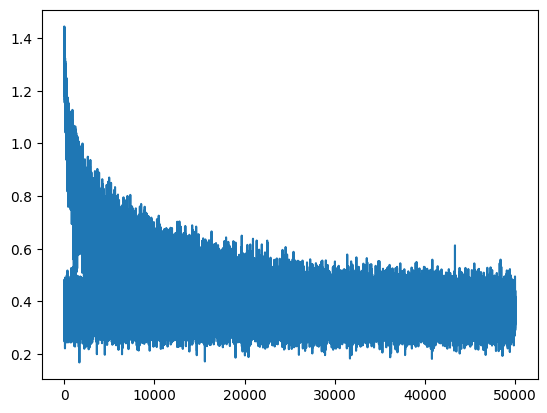

In [67]:
plt.plot(stepi, lossi)

In [14]:
Y[ix]

tensor([25,  1, 19,  0,  5, 14,  1, 14,  9,  1,  1,  5, 14,  1,  0,  0, 15,  8,
        12, 11,  5,  1,  5,  5,  1, 12, 14, 14,  1,  9,  5,  1])

In [103]:
    #emb = C[X] # (32, 3, 2) using words[:5] or C[X[idx]] since it's a minibatch, with all words it's (228146, 3, 2)
    emb = C[Xtr]
    h = torch.tanh(emb.view(emb.shape[0], W1.shape[0]) @ W1 + b1) #(32, 100)
    logits = h @ W2 + b2
    #counts = logits.exp()
    #prob = counts / counts.sum(1, keepdims=True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr)
    loss

tensor(2.4023, grad_fn=<NllLossBackward0>)

In [104]:
    #emb = C[X] # (32, 3, 2) using words[:5] or C[X[idx]] since it's a minibatch, with all words it's (228146, 3, 2)
    emb = C[Xdev]
    h = torch.tanh(emb.view(emb.shape[0], W1.shape[0]) @ W1 + b1) #(32, 100)
    logits = h @ W2 + b2
    #counts = logits.exp()
    #prob = counts / counts.sum(1, keepdims=True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ydev)
    loss

tensor(2.4113, grad_fn=<NllLossBackward0>)

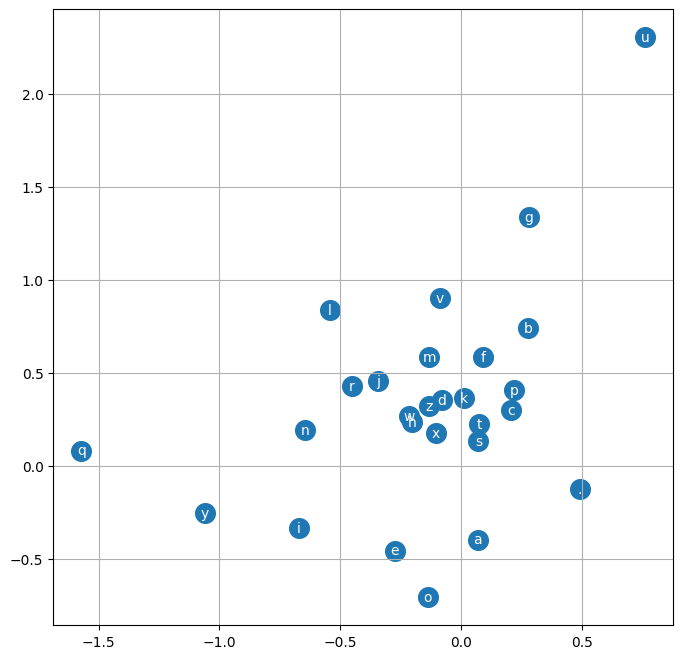

In [49]:
#visualise the character embeddings
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [112]:
#sample from the model

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size #initialize with all ...
    
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

mora.
kayannieel.
ndhonalarethan.
ekdrari.
adered.
elii.
shi.
jelle.
elieananar.
katelosona.
cayszibvlgohimiel.
kinir.
jelionn.
puor.
ummited.
ryy.
juliek.
ylie.
myskeyah.
hyl.


In [79]:
C.shape

torch.Size([27, 10])

In [111]:
context = [0] * block_size
context

[0, 0, 0]